# KNN-MNIST

In this notebook, we will follow the canonical usage of KNN on the MNIST dataset. We will follow the archetypal structure of an end-to-end ML pipeline. Specifically, we will perform data pre-processing, model training, hyperparameter tuning and evaluation. We import the nesserary dependencies, 

In [1]:
# Importing,
import numpy as np
import matplotlib.pyplot as plt
from slowlearn.datasets import load_MNIST
from slowlearn.utils.PCA import PCA
from slowlearn.utils.ConfusionMatrix import ConfusionMatrix
from slowlearn.utils.Sampling import data_split
from slowlearn.utils.Normalisation import MinMaxScaler
from slowlearn.models.KNN import KNNClassifier

### Preprocessing

The first step is the flatten the digit images which are stored in 2D arrays into 1D arrays that represent vectors. Our next step is to split the data into a training and testing set. We assign 99% of our total sample 


That is, we will reduce the dimensionality of the data as much as possible for our KNN because of the so-called _"curse of dimensionality"_

In [35]:
# Loading the dataset,
mnist = load_MNIST()
X, y = mnist.X, mnist.y

# Flattening the images,
X = X.reshape(X.shape[0], -1)

# Creating datasplit,
X_train, X_test, _, y_train, y_test, _ = data_split(X, y, ratios=(0.99, 0.01), seed=0)

# Reducing the dimensionality via PCA,
pca = PCA(n_components=330)
prin_comps, X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Normalising the data,
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Using random sampling over a large enough dataset approximates stratified sampling by the law of large numbers, we can easily double check this empirically,

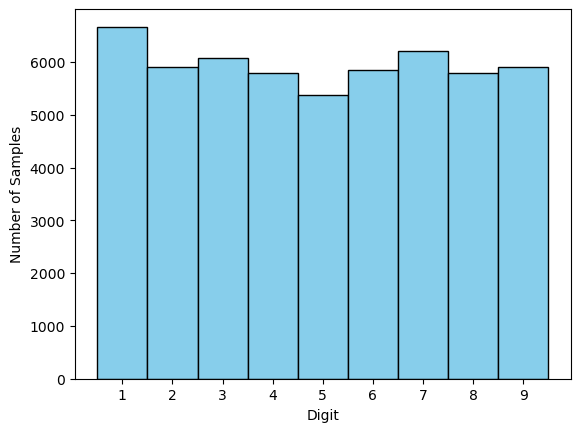

In [39]:
# Plotting,
bins = [i - 0.5 for i in range(1, 11)] # <-- Custom bins.
plt.hist(y_train, color="skyblue", bins=bins, edgecolor="black")
plt.xticks(range(1, 10))
plt.xlabel("Digit")
plt.ylabel("Number of Samples")
plt.plot()
plt.show()

The following code demonstates that $n=330$ principle components are able explain over 99% variance of the dataset. This should not be too suprising considering our EDA since the majority of the pixels in each image are black and contain no information. Therefore, they can be removed without any loss of information. The MNIST dataset has a much smaller effective dimensionality because only a small fraction of pixels in an image carry enough information to distinguish between classes.

optim_comp: 330


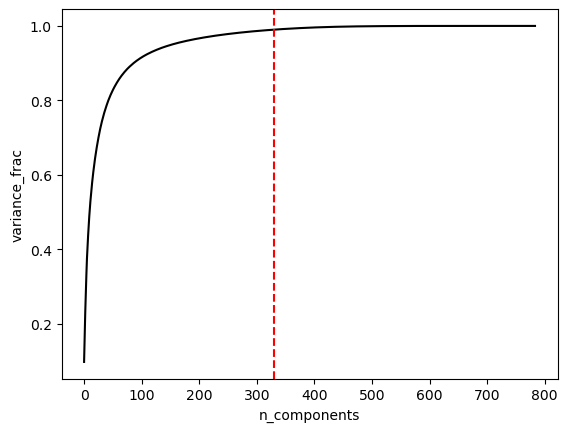

In [40]:
# Reducing the dimensionality via PCA,
pca_demonstration = PCA(n_components=784)
pca_demonstration.fit(X)

# Computing variance ratios,
var_threshold = 0.99
total_vars = np.cumsum(pca_demonstration.compute_var_ratios())
optim_comp = np.argmax(total_vars > var_threshold) # <-- Number of components to explain 99% of the variance of the dataset.
print(f"optim_comp: {optim_comp}")

# Plotting,
plt.plot(total_vars, color="black")
plt.axvline(x=optim_comp, color="red", linestyle="--")
plt.xlabel("n_components")
plt.ylabel("variance_frac")
plt.show()

### Model Creation

In [41]:
# Creating and fitting model,
clf = KNNClassifier(k=3, label="MNIST")
clf.fit(X_train, y_train)

# Constructing confusion matrix and doing a classification report,
conf_matrix = ConfusionMatrix(clf, X_test, y_test)
conf_matrix.report()

Classification Accuracy: 0.967
β: 1

Class        Precision    Recall  Fβ-score   Support
----------------------------------------------------
0                1.000     0.984     1.000        64
1                0.950     1.000     0.950        76
2                1.000     0.981     1.000        52
3                0.952     0.984     0.952        61
4                0.966     0.949     0.966        59
5                0.980     0.923     0.980        52
6                0.984     1.000     0.984        63
7                0.954     0.969     0.954        64
8                0.962     0.944     0.962        54
9                0.926     0.909     0.926        55
----------------------------------------------------
Average              0.967     0.964     0.967
Weighted-average     0.967     0.967     0.967


### Hyperparameter Tuning